In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import metrics
import tensorflow as tf
from tensorflow import keras

data = pd.read_csv("C:/Users/UserName/Desktop/인공지능 개론/데이터 셋/diabetes.csv")
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


<h3>#데이터 타입, 결측값, 컬럼 확인</h3>

In [29]:
type(data)

pandas.core.frame.DataFrame

In [30]:
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [31]:
data.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

<h3>#EDA 수행</h3>

Text(0.5, 1.0, 'Label')

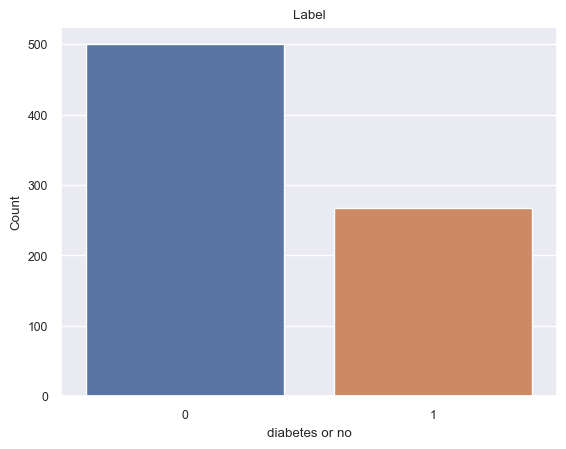

In [32]:
sns.countplot(data = data, x="Outcome")
plt.xlabel("diabetes or no")
plt.ylabel("Count")
plt.title("Label")

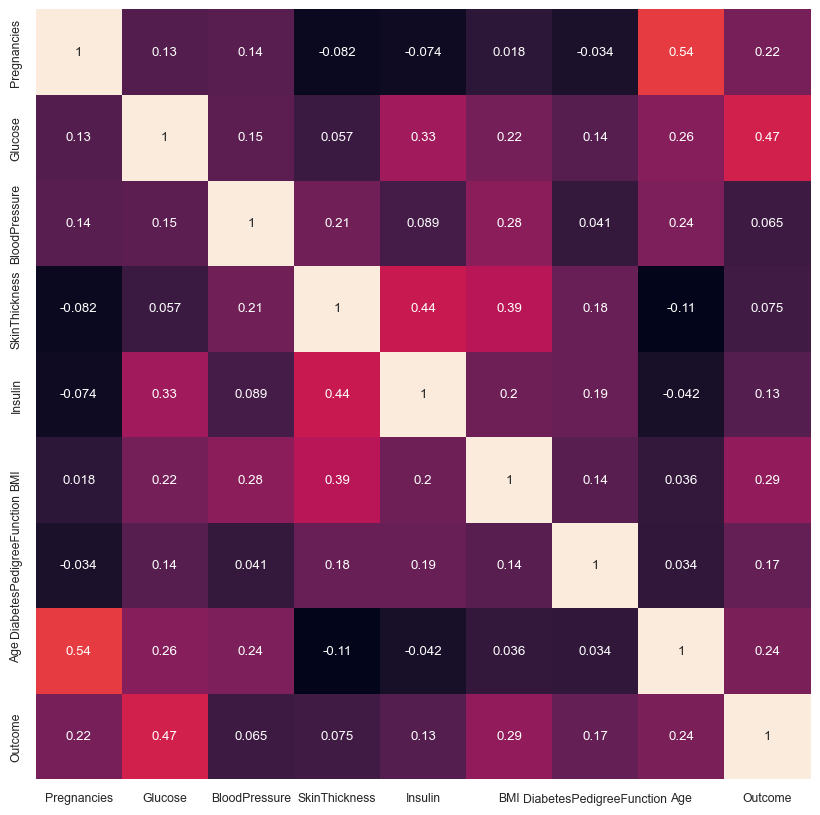

In [33]:
df_corr = data.corr()

plt.figure(figsize=(10, 10))
sns.set(font_scale=0.8)
sns.heatmap(df_corr, annot=True, cbar=False)
plt.show()

In [42]:
#Splitting the data into training and test test
X = data.iloc[:,0:7].values
y = data.iloc[:,8].values

from sklearn.preprocessing import LabelEncoder
encoder =  LabelEncoder()
y1 = encoder.fit_transform(y)

Y = pd.get_dummies(y).values


from sklearn.model_selection import train_test_split
X_train,X_test, y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=0) 

In [43]:
X

array([[  6.   , 148.   ,  72.   , ...,   0.   ,  33.6  ,   0.627],
       [  1.   ,  85.   ,  66.   , ...,   0.   ,  26.6  ,   0.351],
       [  8.   , 183.   ,  64.   , ...,   0.   ,  23.3  ,   0.672],
       ...,
       [  5.   , 121.   ,  72.   , ..., 112.   ,  26.2  ,   0.245],
       [  1.   , 126.   ,  60.   , ...,   0.   ,  30.1  ,   0.349],
       [  1.   ,  93.   ,  70.   , ...,   0.   ,  30.4  ,   0.315]])

In [44]:
Y

array([[0, 1],
       [1, 0],
       [0, 1],
       ...,
       [1, 0],
       [0, 1],
       [1, 0]], dtype=uint8)

In [61]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD,Adam


model = Sequential()

model.add(Dense(7,input_shape=(7,),activation='relu'))
model.add(Dense(7,activation='relu'))
model.add(Dense(7,activation='relu'))
model.add(Dense(2,activation='sigmoid'))

model.compile(Adam(lr=0.02),'binary_crossentropy',metrics=['accuracy'])

model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_16 (Dense)            (None, 7)                 56        
                                                                 
 dense_17 (Dense)            (None, 7)                 56        
                                                                 
 dense_18 (Dense)            (None, 7)                 56        
                                                                 
 dense_19 (Dense)            (None, 2)                 16        
                                                                 
Total params: 184
Trainable params: 184
Non-trainable params: 0
_________________________________________________________________


c:\new\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [62]:
model_history=model.fit(x=X_train, y=y_train, epochs=100, batch_size=32,validation_data= (X_test,y_test))
y_pred = model.predict(X_test)

y_test_class = np.argmax(y_test,axis=1)
y_pred_class = np.argmax(y_pred,axis=1)

Epoch 1/100
20/20 [==============================] - 1s 14ms/step - loss: 1.7663 - accuracy: 0.4967 - val_loss: 0.6986 - val_accuracy: 0.3766
Epoch 2/100
20/20 [==============================] - 0s 4ms/step - loss: 0.6962 - accuracy: 0.5733 - val_loss: 0.6393 - val_accuracy: 0.6948
Epoch 3/100
20/20 [==============================] - 0s 4ms/step - loss: 0.6586 - accuracy: 0.6401 - val_loss: 0.6245 - val_accuracy: 0.6948
Epoch 4/100
20/20 [==============================] - 0s 5ms/step - loss: 0.6587 - accuracy: 0.6401 - val_loss: 0.6305 - val_accuracy: 0.6948
Epoch 5/100
20/20 [==============================] - 0s 5ms/step - loss: 0.6543 - accuracy: 0.6401 - val_loss: 0.6070 - val_accuracy: 0.6948
Epoch 6/100
20/20 [==============================] - 0s 4ms/step - loss: 0.6413 - accuracy: 0.6417 - val_loss: 0.6040 - val_accuracy: 0.6883
Epoch 7/100
20/20 [==============================] - 0s 4ms/step - loss: 0.6306 - accuracy: 0.6417 - val_loss: 0.5918 - val_accuracy: 0.6883
Epoch 8/100


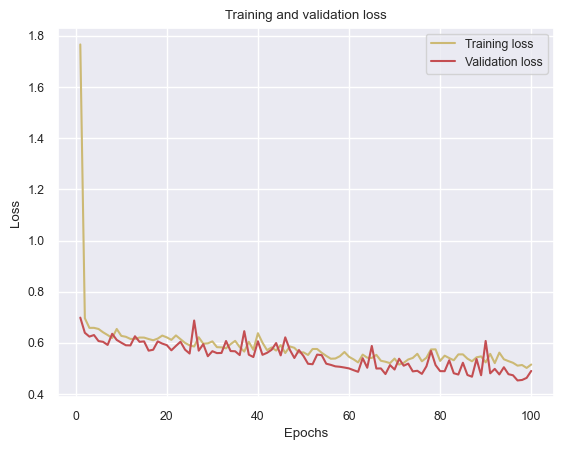

In [63]:
import matplotlib.pyplot as plt
import seaborn as sns

loss =model_history.history['loss']
val_loss =model_history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

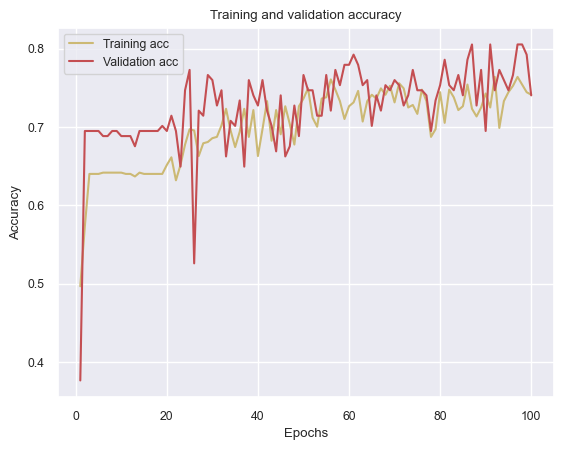

In [64]:
acc =model_history.history['accuracy']
val_acc =model_history.history['val_accuracy']
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [65]:
#Accuracy of the predicted values
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test_class,y_pred_class))
print(confusion_matrix(y_test_class,y_pred_class))

              precision    recall  f1-score   support

           0       0.85      0.77      0.80       107
           1       0.56      0.68      0.62        47

    accuracy                           0.74       154
   macro avg       0.70      0.72      0.71       154
weighted avg       0.76      0.74      0.75       154

[[82 25]
 [15 32]]
